### IMPORT DATASETS AND LIBRARIES

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
from google.colab import files
files.upload()

Saving stock.csv to stock.csv


{'stock.csv': b'Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500\n2012-01-12,60.19857,75.510002,30.120001000000002,12.13,175.929993,180.550003,28.25,313.644379,1295.5\n2012-01-13,59.972857999999995,74.599998,30.07,12.35,178.419998,179.16000400000001,22.790001,311.32806400000004,1289.089966\n2012-01-17,60.671429,75.239998,30.25,12.25,181.66000400000001,180.0,26.6,313.11636400000003,1293.670044\n2012-01-18,61.30143,75.059998,30.33,12.73,189.440002,181.070007,26.809998999999998,315.273285,1308.040039\n2012-01-19,61.10714300000001,75.559998,30.42,12.8,194.449997,180.520004,26.76,318.590851,1314.5\n2012-01-20,60.042857999999995,75.519997,30.51,12.64,190.929993,188.520004,26.6,291.90087900000003,1315.380005\n2012-01-23,61.05857099999999,75.510002,30.4,13.14,186.08999599999999,189.979996,26.77,291.666748,1316.0\n2012-01-24,60.05857099999999,75.360001,30.09,13.16,187.0,191.929993,27.42,289.380341,1314.650024\n2012-01-25,63.80857099999999,75.82,30.209999,13.11,187.800003,191.729996,27.96999899999999

In [4]:
stocks_df = pd.read_csv('stock.csv')
stocks_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [5]:
stocks_df.shape

(2159, 10)

In [6]:
# Sort the stock data by date

stocks_df.sort_values(by=['Date'])

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [7]:
# Print out the number of stocks

print('The number of stocks: ', len(stocks_df.columns[1:]))

# Print the name of stocks
print('The name of stocks: ', [i for i in stocks_df.columns[1:]])
print('The name of stocks: ', stocks_df.columns[1:])

The number of stocks:  9
The name of stocks:  ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']
The name of stocks:  Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')


In [8]:
# What is the average return of the S&P500

stocks_df.mean()
print(stocks_df['sp500'].mean())
 

2218.7495540592877


In [9]:
# Which stock or index has the minimum dispertion from the mean in dollar value?

stocks_df.std() # AMZN is the most volatile stock 

AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
dtype: float64

In [10]:
# What is the maximum price for AMZN stock over the specified time period?

stocks_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


### PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [11]:
stocks_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [12]:
# Getting dataframe info

stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [13]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, you can simply plot data directly from a Pandas DataFrame using plot() method

In [14]:
def show_plot(df, fig_title):
    df.plot(x='Date', figsize=(15, 7), linewidth=3, title=fig_title)
    plt.grid()
    plt.show()

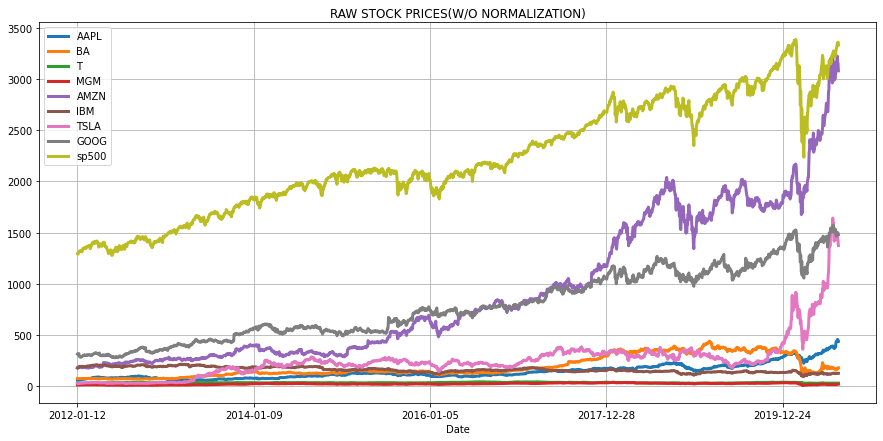

In [15]:
# Plot the data
show_plot(stocks_df, 'RAW STOCK PRICES(W/O NORMALIZATION)')

In [16]:
# Print out normalized (scaled) stock prices

def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

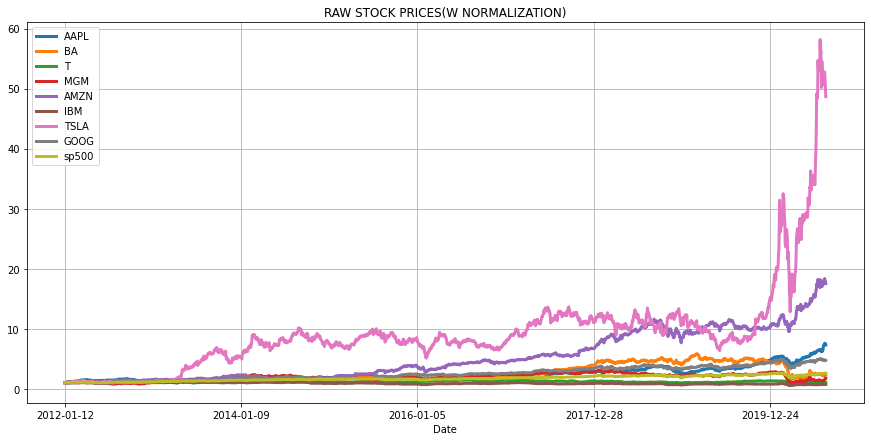

In [17]:
show_plot(normalize(stocks_df), 'RAW STOCK PRICES(W NORMALIZATION)')

### PERFORM INTERACTIVE DATA VISUALIZATION

In [18]:
# Function to perform an interactive data plotting using plotly express
# Plotly.express module which is imported as px includes functions that can plot interactive plots easily and effectively. 
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance. 

In [24]:
def interactive_plot(df, title):
    fig = px.line(title=title)
    for i in df.columns[1:]:
        fig.add_scatter(x=df['Date'], y=df[i], name=i)
    
    fig.show()  

In [26]:
interactive_plot(stocks_df, 'Prices')

- **Plot normalized stock data in an interactive way**


In [31]:
interactive_plot(normalize(stocks_df), 'INTERACTIVE PLOT: RAW STOCK PRICES(W NORMALIZATION)')

### CALCULATE INDIVIDUAL STOCKS DAILY RETURNS

In [60]:
# Let's calculate daily return for a single security
# Let's take the S&P500 as an example first

df = stocks_df['sp500']
df_daily_returns = df.copy()

for j in range(1, len(df)):
    df_daily_returns[j] = ((df[j] - df[j-1])/df[j-1]) * 100
 
df_daily_returns[0] = 0
df_daily_returns

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

In [61]:
# Calculate the daily return for Amazon stock.

df_amzn = stocks_df['AMZN']
df_daily_returns_amzn = df_amzn.copy()

for j in range(1, len(df_amzn)):
    df_daily_returns_amzn[j] = ((df_amzn[j] - df_amzn[j-1])/df_amzn[j-1]) * 100
 
df_daily_returns_amzn[0] = 0
df_daily_returns_amzn

0       0.000000
1       1.415339
2       1.815943
3       4.282725
4       2.644634
          ...   
2154    2.109065
2155    0.623082
2156   -1.784187
2157   -0.609323
2158   -2.143792
Name: AMZN, Length: 2159, dtype: float64

### CALCULATE MULTIPLE STOCKS DAILY RETURNS

In [62]:
def daily_return(df):
    df_daily_return = df.copy()

    for i in df.columns[1:]:
        for j in range(1, len(df)):
            df_daily_return[i][j] = ((df[i][j] - df[i][j-1])/df[i][j-1]) * 100
        
    df_daily_return[i][0] = 0
    return df_daily_return


In [63]:
daily_return(stocks_df)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


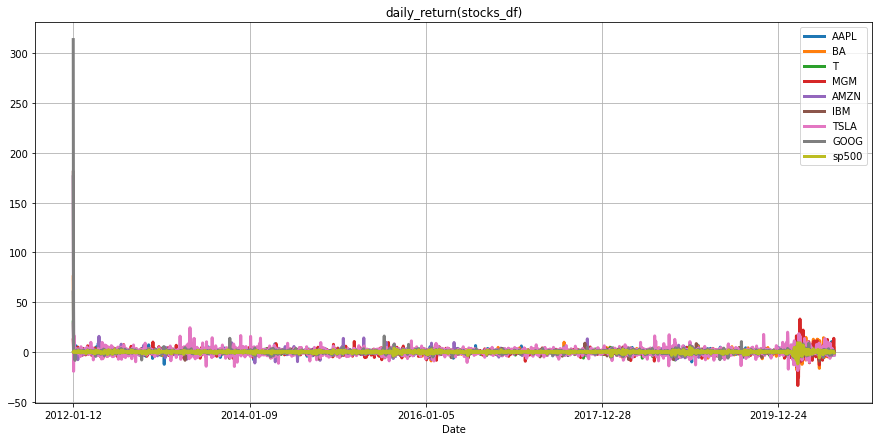

In [72]:
show_plot(daily_return(stocks_df), 'daily_return(stocks_df)')

In [70]:
interactive_plot(daily_return(stocks_df), 'Prices')

### CALCULATE THE CORRELATIONS BETWEEN DAILY RETURNS

In [74]:
# Daily Return Correlation
# df.drop(['A'], axis=1)
stocks_daily_return = daily_return(stocks_df).drop(['Date'], axis=1)
stocks_daily_return

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,0.000000
1,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...
2154,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


In [75]:
cm = stocks_daily_return.corr()
cm

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
AAPL,1.000000,0.596413,0.514032,0.364509,0.675087,0.673817,0.331622,0.667229,0.530749
BA,0.596413,1.000000,0.556335,0.503018,0.618512,0.682055,0.301726,0.640114,0.520644
T,0.514032,0.556335,1.000000,0.344317,0.500489,0.576819,0.212620,0.515900,0.549071
MGM,0.364509,0.503018,0.344317,1.000000,0.223543,0.240259,0.322100,0.191624,0.628551
AMZN,0.675087,0.618512,0.500489,0.223543,1.000000,0.889373,0.292897,0.927106,0.244079
IBM,0.673817,0.682055,0.576819,0.240259,0.889373,1.000000,0.246033,0.949782,0.242309
TSLA,0.331622,0.301726,0.212620,0.322100,0.292897,0.246033,1.000000,0.241235,0.381888
GOOG,0.667229,0.640114,0.515900,0.191624,0.927106,0.949782,0.241235,1.000000,0.155595
sp500,0.530749,0.520644,0.549071,0.628551,0.244079,0.242309,0.381888,0.155595,1.000000


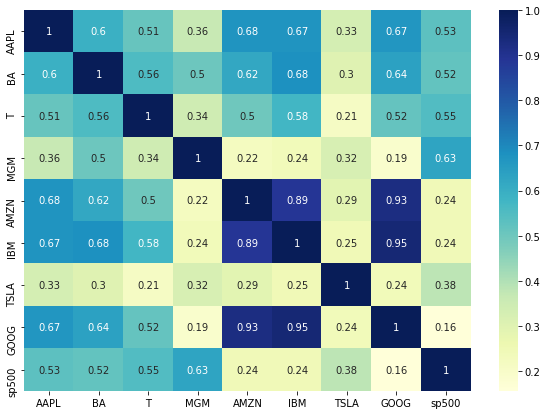

In [83]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="YlGnBu")

### PLOT THE HISTOGRAM FOR DAILY RETURNS

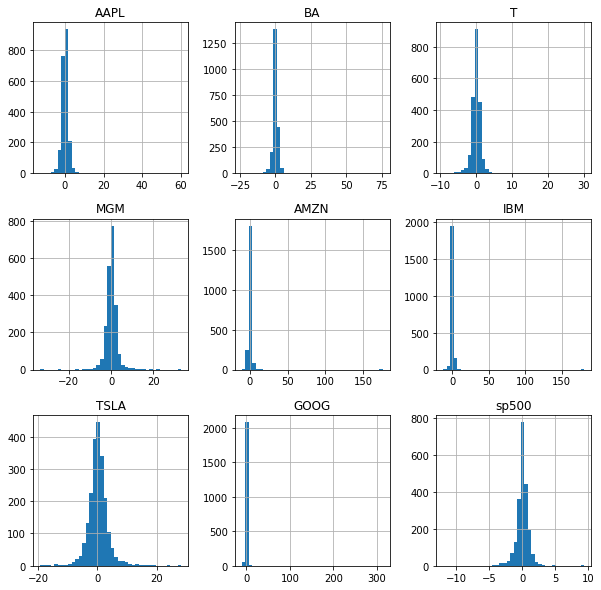

In [86]:
stocks_daily_return.hist(figsize=(10,10), bins=40);

In [90]:
df_hist = stocks_daily_return.copy()
data = []
for i in df_hist:
    data.append(stocks_daily_return[i].values)
data

[array([60.19857   , -0.37494578,  1.16481192, ..., -2.44945751,
         1.45347999, -2.9739868 ]),
 array([75.510002  , -1.20514366,  0.85790887, ..., -1.26596576,
         5.52287953,  0.40131597]),
 array([30.120001  , -0.16600597,  0.59860326, ...,  0.60321716,
         0.5996036 ,  0.        ]),
 array([12.13      ,  1.81368508, -0.8097166 , ...,  3.08776831,
        13.76772918, -0.69284065]),
 array([175.929993  ,   1.41533854,   1.8159433 , ...,  -1.78418726,
         -0.60932259,  -2.14379167]),
 array([180.550003  ,  -0.76986928,   0.46885241, ...,  -0.91976211,
          1.72055219,  -0.28322004]),
 array([ 28.25      , -19.32743009,  16.71785359, ...,  -2.47519409,
         -2.35009162,  -3.1143992 ]),
 array([ 3.13644379e+02, -7.38516344e-01,  5.74410150e-01, ...,
        -3.73974141e-01,  1.07728122e-01, -1.05474435e+00]),
 array([ 0.        , -0.49479228,  0.35529545, ...,  0.06330295,
         0.27422185, -0.79691324])]

In [93]:
# Plotly's Python API contains a super pwerful module known as figure factory module 
# Figure factory module includes wrapper functions that create unique chart types such as interactive subplots 
# Check this out for more information: https://plotly.com/python/figure-factory-subplots/
# Notice how Boeing, Tesla and MGM gains are losses are sometimes extreme! This will indicate a more risky investment and will be quantified later using Sharpe Ratio

fig = ff.create_distplot(data, df_hist.columns)
fig.show()